In [2]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/jeju_raw_data/jeju_진완_sheet_1.xlsx', index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2904 entries, nan to nan
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   관광지명      2904 non-null   object
 1   도로명주소     2904 non-null   object
 2   중분류 카테고리  2904 non-null   object
 3   소분류 카테고리  2904 non-null   object
dtypes: object(4)
memory usage: 113.4+ KB


In [ ]:
df.columns

Index(['Unnamed: 0', '관광지명', '도로명주소', '중분류 카테고리', '소분류 카테고리'], dtype='object')

In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')
# 위도, 경도 반환하는 함수
def geocoding(address):
  try:
    geo = geo_local.geocode(address)
    x_y = [geo.latitude, geo.longitude]
    return x_y
  except:
    return 'NaN'

In [ ]:
address = df['도로명주소']
latitude = []
longitude =[]

for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

In [ ]:
len(latitude)

2904

In [ ]:
len(longitude)

2904

In [ ]:
df['lat'] = latitude
df['long'] = longitude

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2904 entries, nan to nan
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   관광지명      2904 non-null   object
 1   도로명주소     2904 non-null   object
 2   중분류 카테고리  2904 non-null   object
 3   소분류 카테고리  2904 non-null   object
 4   lat       2904 non-null   object
 5   long      2904 non-null   object
dtypes: object(6)
memory usage: 158.8+ KB


In [ ]:
longi = []
for i in longitude:
  if i == 'a':
    i = np.nan
    longi.append(i)
  else:
    longi.append(i)

In [ ]:
lati = []
for i in latitude:
  if i == 'N':
    i = np.nan
    lati.append(i)
  else:
    lati.append(i)

In [ ]:
df['lat'] = lati
df['long'] = longi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2904 entries, nan to nan
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관광지명      2904 non-null   object 
 1   도로명주소     2904 non-null   object 
 2   중분류 카테고리  2904 non-null   object 
 3   소분류 카테고리  2904 non-null   object 
 4   lat       1617 non-null   float64
 5   long      1617 non-null   float64
dtypes: float64(2), object(4)
memory usage: 158.8+ KB


In [ ]:
df.head()

,관광지명,도로명주소,중분류 카테고리,소분류 카테고리,lat,long
NaN,제주국제공항,제주 제주시 공항로 2-0,기타관광지,공항,33.505533,126.496158
NaN,동문재래시장,제주 제주시 관덕로14길 20-0,쇼핑,재래시장,NaN,NaN
NaN,함덕해수욕장,제주 제주시 조함해안로 525-0,자연관광지,해수욕장,NaN,NaN
NaN,아르떼뮤지엄제주,제주 제주시 어림비로 478-0,문화시설,전시장,NaN,NaN
NaN,비자림,제주 제주시 비자숲길 55-0,자연관광지,자연휴양림,33.494465,126.811305


In [ ]:
df.reset_index()

,index,관광지명,도로명주소,중분류 카테고리,소분류 카테고리,lat,long
0,NaN,제주국제공항,제주 제주시 공항로 2-0,기타관광지,공항,33.505533,126.496158
1,NaN,동문재래시장,제주 제주시 관덕로14길 20-0,쇼핑,재래시장,NaN,NaN
2,NaN,함덕해수욕장,제주 제주시 조함해안로 525-0,자연관광지,해수욕장,NaN,NaN
3,NaN,아르떼뮤지엄제주,제주 제주시 어림비로 478-0,문화시설,전시장,NaN,NaN
4,NaN,비자림,제주 제주시 비자숲길 55-0,자연관광지,자연휴양림,33.494465,126.811305
...,...,...,...,...,...,...,...
2899,NaN,예향건강원,제주 제주시 번영로 540-0,쇼핑,쇼핑기타,NaN,NaN
2900,NaN,정일품한복점,제주 제주시 사장길 6-0,쇼핑,쇼핑기타,33.484605,126.495653
2901,NaN,로드랜드컨츄리클럽,제주 제주시 화전길 201-0,레포츠(육상/해상/항공),골프장,NaN,NaN
2902,NaN,장수식육점,제주 제주시 동광로17길 50-0,쇼핑,쇼핑기타,33.508752,126.538886


In [ ]:
df.columns

Index(['관광지명', '도로명주소', '중분류 카테고리', '소분류 카테고리', 'lat', 'long'], dtype='object')

In [ ]:
df['index'] = [i for i in range(len(df['관광지명']))]

In [ ]:
df = df.set_index('index')

In [ ]:
df.to_csv('jeju_jin_train_data.csv')

# 데이터 받기

In [93]:
df_jeju = pd.read_csv('/content/drive/MyDrive/jeju_raw_data/jeju_jin_train_data.csv', index_col=0)

In [94]:
df_jeju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904 entries, 0 to 2903
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관광지명      2904 non-null   object 
 1   도로명주소     2904 non-null   object 
 2   중분류 카테고리  2904 non-null   object 
 3   소분류 카테고리  2904 non-null   object 
 4   lat       1617 non-null   float64
 5   long      1617 non-null   float64
dtypes: float64(2), object(4)
memory usage: 158.8+ KB


In [95]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [96]:
df_jeju = df_jeju.dropna(axis = 0)

In [97]:
df_jeju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1617 entries, 0 to 2902
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관광지명      1617 non-null   object 
 1   도로명주소     1617 non-null   object 
 2   중분류 카테고리  1617 non-null   object 
 3   소분류 카테고리  1617 non-null   object 
 4   lat       1617 non-null   float64
 5   long      1617 non-null   float64
dtypes: float64(2), object(4)
memory usage: 88.4+ KB


# 제주도 지역분포 확인

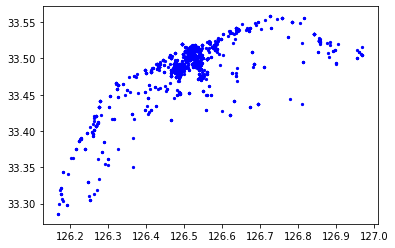

In [98]:
x = df_jeju['long']
y = df_jeju['lat']
plt.scatter(x, y, s = 5, c = 'b')
plt.show()
plt.close()

# K-means 군집

In [99]:
train = df_jeju.loc[:,['long','lat']]
Kmean = KMeans(n_clusters=25)
Kmean.fit(train)

KMeans(n_clusters=25)

In [100]:
Kmean.cluster_centers_

array([[126.42577199,  33.48557288],
       [126.82947593,  33.52637744],
       [126.53381615,  33.49398457],
       [126.27258112,  33.41741586],
       [126.96173124,  33.50622062],
       [126.58150009,  33.51797868],
       [126.47398197,  33.48699529],
       [126.64835952,  33.53933124],
       [126.69663139,  33.43646795],
       [126.22787987,  33.38284592],
       [126.33257385,  33.46181108],
       [126.25541178,  33.31797141],
       [126.86687165,  33.51831123],
       [126.49156968,  33.48562464],
       [126.52501252,  33.5130836 ],
       [126.39553972,  33.43316379],
       [126.17918481,  33.31285668],
       [126.62717764,  33.45187351],
       [126.75604365,  33.55126811],
       [126.50458931,  33.50710431],
       [126.55409851,  33.50604298],
       [126.54942336,  33.47001239],
       [126.68759129,  33.49866809],
       [126.48370164,  33.44798996],
       [126.29964956,  33.36617175]])

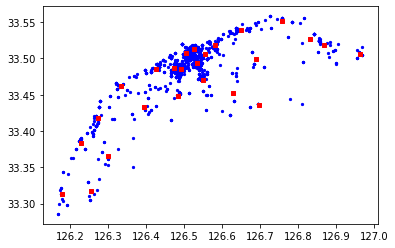

In [101]:
plt.scatter(x, y, s =5, c='b')
for i, j in Kmean.cluster_centers_:
  plt.scatter(i, j, s=20, c='r', marker='s')
plt.show()
plt.close()

# 중심과의 거리에 따라 군집하기

In [102]:
centers = Kmean.cluster_centers_
arr = []
for la, lo in zip(df_jeju['lat'], df_jeju['long']):
  result = []
  for x, y in centers:
    answer = ((la - y)**2 + (lo - x)**2)**.5
    result.append(answer)
  arr.append(result.index(min(result)))
df_jeju['center'] = arr

In [103]:
len(arr)

1617

In [104]:
df_jeju.reset_index()
df_jeju.head()

,관광지명,도로명주소,중분류 카테고리,소분류 카테고리,lat,long,center
index,,,,,,,
0,제주국제공항,제주 제주시 공항로 2-0,기타관광지,공항,33.505533,126.496158,19
4,비자림,제주 제주시 비자숲길 55-0,자연관광지,자연휴양림,33.494465,126.811305,1
5,금능해수욕장,제주 제주시 금능길 119-10,자연관광지,해수욕장,33.386638,126.224729,9
7,김녕해수욕장,제주 제주시 해맞이해안로 7-6,자연관광지,해수욕장,33.534063,126.840117,1
8,용두암,제주 제주시 용두암길 15-0,기타관광지,관광명소기타,33.511757,126.513278,19


In [105]:
result = []
for x, y in centers:
  answer = (126.496158 - x)**2 + (33.505533 - y)**2
  result.append(answer)
print(result.index(min(result)))
print(min(result))
print(result)

19
7.355607610246935e-05
[0.0053525964306710165, 0.11153533419887085, 0.0015515020609563055, 0.057751250641408486, 0.2167589161841569, 0.00743816777824503, 0.0008354229469480193, 0.024307623917227062, 0.04495956189784305, 0.08702527410240186, 0.028671380202161468, 0.0931380924876128, 0.13759189062627017, 0.00041739558975775276, 0.0008895948569509516, 0.015361340117950099, 0.13759616540096087, 0.02004548652239495, 0.06963225406205205, 7.355607610246935e-05, 0.003357362497503498, 0.0040989117689893845, 0.036693830187549265, 0.0034663620276542103, 0.05803712483056192]


# 같은 군집에 따라 카테고리(소분류) 분류

In [106]:
category_dict = {}
for i in range(len(set(df_jeju.center))):
  category_dict[i] = []

for x,y in zip(df_jeju['소분류 카테고리'], df_jeju['center']):
  category_dict[y].append(x)

for i in range(len(set(df_jeju.center))):
  category_dict[i] = set(category_dict[i])

In [107]:
category_dict[0]

{'골프장',
 '관광명소기타',
 '낚시',
 '농수축산물시장',
 '레저/스포츠기타',
 '문화생활시설기타',
 '쇼핑기타',
 '수상해양스포츠',
 '수영장',
 '시장기타',
 '여행/레저기타',
 '절',
 '체험농가',
 '항구',
 '화랑/전시관'}

In [ ]:
category_long = []
for i in range(len(set(df_jeju.center))):
  category_long.append(len(category_dict[i]))
category_long

In [109]:
len(category_long)

25

In [110]:
category_dict[24]

{'관광명소기타', '문화원', '미술관', '박물관/기념관', '쇼핑기타', '승마장'}

In [112]:
arr = list(category_dict[24])
arr

['쇼핑기타', '문화원', '승마장', '관광명소기타', '미술관', '박물관/기념관']

In [ ]:
# df.set_index(pd.Index(['1번', '2번', '3번', '4번']))
df_jeju.set_index(pd.Index([i for i in range(len(df_jeju['관광지명']))]))

# 새로운 학습데이터 만들기

In [115]:
df_train = pd.DataFrame()

In [116]:
df_train['관광지명'] = df_jeju['관광지명']
df_train['도로명주소'] = df_jeju['도로명주소']

In [125]:
theme = []
for i in df_jeju.center:
  theme.append(list(category_dict[i]))

print(theme[0])
print(len(theme))

['스케이트장', '문화생활시설기타', '명산', '쇼핑기타', '운동장', '농수축산물시장', '낚시', '골프장', '공항', '면세점', '절', '여행/레저기타', '수상해양스포츠', '수영장', '레저/스포츠기타', '관광명소기타', '공연장', '데이트코스']
1617


In [126]:
list(category_dict[19])

['스케이트장',
 '문화생활시설기타',
 '명산',
 '쇼핑기타',
 '운동장',
 '농수축산물시장',
 '낚시',
 '골프장',
 '공항',
 '면세점',
 '절',
 '여행/레저기타',
 '수상해양스포츠',
 '수영장',
 '레저/스포츠기타',
 '관광명소기타',
 '공연장',
 '데이트코스']

In [128]:
df_train['theme'] = theme

In [129]:
df_train.head()

,관광지명,도로명주소,theme
index,,,
0,제주국제공항,제주 제주시 공항로 2-0,"[스케이트장, 문화생활시설기타, 명산, 쇼핑기타, 운동장, 농수축산물시장, 낚시, ..."
4,비자림,제주 제주시 비자숲길 55-0,"[문화생활시설기타, 쇼핑기타, 해수욕장, 전시장, 농수축산물시장, 화랑/전시관, 자..."
5,금능해수욕장,제주 제주시 금능길 119-10,"[문화생활시설기타, 쇼핑기타, 해수욕장, 방파제, 고택/생가/민속마을, 종합위락시설..."
7,김녕해수욕장,제주 제주시 해맞이해안로 7-6,"[문화생활시설기타, 쇼핑기타, 해수욕장, 전시장, 농수축산물시장, 화랑/전시관, 자..."
8,용두암,제주 제주시 용두암길 15-0,"[스케이트장, 문화생활시설기타, 명산, 쇼핑기타, 운동장, 농수축산물시장, 낚시, ..."


In [131]:
df_train.set_index(pd.Index([i for i in range(len(df_train['관광지명']))]))

,관광지명,도로명주소,theme
0,제주국제공항,제주 제주시 공항로 2-0,"[스케이트장, 문화생활시설기타, 명산, 쇼핑기타, 운동장, 농수축산물시장, 낚시, ..."
1,비자림,제주 제주시 비자숲길 55-0,"[문화생활시설기타, 쇼핑기타, 해수욕장, 전시장, 농수축산물시장, 화랑/전시관, 자..."
2,금능해수욕장,제주 제주시 금능길 119-10,"[문화생활시설기타, 쇼핑기타, 해수욕장, 방파제, 고택/생가/민속마을, 종합위락시설..."
3,김녕해수욕장,제주 제주시 해맞이해안로 7-6,"[문화생활시설기타, 쇼핑기타, 해수욕장, 전시장, 농수축산물시장, 화랑/전시관, 자..."
4,용두암,제주 제주시 용두암길 15-0,"[스케이트장, 문화생활시설기타, 명산, 쇼핑기타, 운동장, 농수축산물시장, 낚시, ..."
...,...,...,...
1612,오에스티신제주점,제주 제주시 신광로 34-0,"[카지노, 농수축산물시장, 수영장, 관광명소기타, 체험농가, 절, 수련장, 박물관/..."
1613,곰돌이청과,제주 제주시 월랑북길 17-0,"[농수축산물시장, 수영장, 관광명소기타, 공연장, 운동장, 화랑/전시관, 수상해양스..."
1614,아리따움대학로점,제주 제주시 광양14길 2-0,"[재래시장, 문화생활시설기타, 쇼핑기타, 사격장, 농수축산물시장, 화랑/전시관, 골..."
1615,정일품한복점,제주 제주시 사장길 6-0,"[카지노, 농수축산물시장, 수영장, 관광명소기타, 체험농가, 절, 수련장, 박물관/..."


In [133]:
df_train.to_excel('jeju_train_jin_theme.xlsx')

In [134]:
df_train['중앙카테고리'] = df_jeju['center']

In [135]:
df_train.head()

,관광지명,도로명주소,theme,중앙카테고리
index,,,,
0,제주국제공항,제주 제주시 공항로 2-0,"[스케이트장, 문화생활시설기타, 명산, 쇼핑기타, 운동장, 농수축산물시장, 낚시, ...",19
4,비자림,제주 제주시 비자숲길 55-0,"[문화생활시설기타, 쇼핑기타, 해수욕장, 전시장, 농수축산물시장, 화랑/전시관, 자...",1
5,금능해수욕장,제주 제주시 금능길 119-10,"[문화생활시설기타, 쇼핑기타, 해수욕장, 방파제, 고택/생가/민속마을, 종합위락시설...",9
7,김녕해수욕장,제주 제주시 해맞이해안로 7-6,"[문화생활시설기타, 쇼핑기타, 해수욕장, 전시장, 농수축산물시장, 화랑/전시관, 자...",1
8,용두암,제주 제주시 용두암길 15-0,"[스케이트장, 문화생활시설기타, 명산, 쇼핑기타, 운동장, 농수축산물시장, 낚시, ...",19


# theme 나누기

In [136]:
set(df_jeju['소분류 카테고리'])

{'고개/재/령',
 '고택/생가/민속마을',
 '골프장',
 '공연장',
 '공원',
 '공항',
 '관광명소기타',
 '관광안내소',
 '극장',
 '낚시',
 '놀이시설',
 '농수축산물시장',
 '데이트코스',
 '동굴',
 '동식물원',
 '등대',
 '레저/스포츠기타',
 '면세점',
 '명산',
 '문화생활시설기타',
 '문화원',
 '문화유적지',
 '미술관',
 '박물관/기념관',
 '방파제',
 '사격장',
 '산림욕장',
 '쇼핑기타',
 '쇼핑센터',
 '수련장',
 '수상해양스포츠',
 '수영장',
 '스케이트장',
 '승마장',
 '시장기타',
 '양궁/곡궁',
 '여행/레저기타',
 '온천',
 '운동장',
 '자동차극장',
 '자연휴양림',
 '재래시장',
 '전시장',
 '절',
 '정자',
 '종합시장',
 '종합위락시설',
 '체험농가',
 '촬영지',
 '축제',
 '카레이싱장',
 '카지노',
 '탑',
 '테마파크',
 '포구',
 '폭포/계곡',
 '항구',
 '해수욕장',
 '화랑/전시관'}